Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# Ch. 03 미래를 예측하는 데이터 분석 

-----

# 3.1) 국내 프로야구 연봉 예측

- [<Step1. 탐색> 프로야구 연봉 데이터 살펴보기](#<Step1.-탐색>-프로야구-연봉-데이터-살펴보기)
    - [프로야구 연봉 데이터셋의 기본 정보]
    - [회귀 분석에 사용할 피처 살펴보기]
- [<Step2. 예측> : 투수의 연봉 예측하기](#<Step2.-예측>-:-투수의-연봉-예측하기)
    - [피처들의 단위 맞춰주기 : 피처 스케일링]
    - [피처들의 단위 맞춰주기 : one-hot-encoding]
    - [피처들의 상관관계 분석]
    - [회귀 분석 적용하기]
- [<Step3. 평가> : 예측 모델 평가하기](#<Step3.-평가>-:-예측-모델-평가하기)
    - [어떤 피처가 가장 영향력이 강한 피처일까]
    - [예측 모델의 평가]
    - [회귀 분석 예측 성능을 높이기 위한 방법 : 다중 공선성 확인]
    - [믿을만한 피처로 다시 학습하기]
- [<Step4. 시각화> : 분석 결과의 시각화](#<Step4.-시각화>-:-분석-결과의-시각화)
    - [예상 연봉과 실제 연봉 비교]

-----

## 회귀분석  


* 독립변수(x)와 종속변수(y) 간의 관계를 찾아내는 것
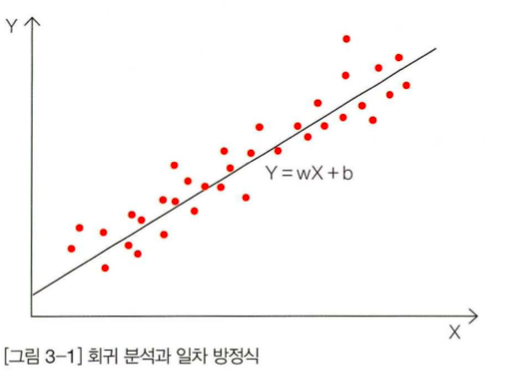
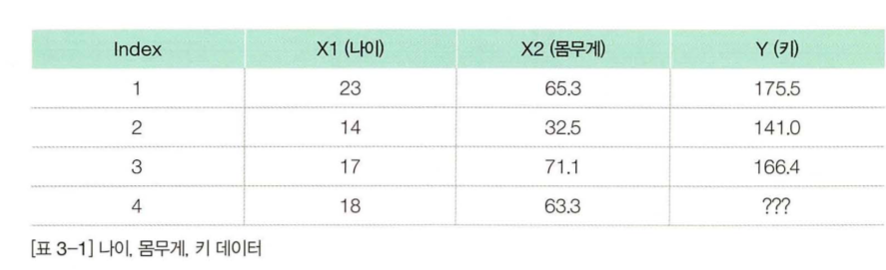




#### 지도학습
* 학습 훈련 데이터(training data)로 입력과 출력이 같이 제공되는 상황을 문제(입력)의 답(출력)을 가르쳐 주는 것에 비유하여 지도형 기계 학습(

In [2]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline 
#Jupyter 를 통해 출력할 때 사용

import matplotlib.pyplot as plt

# <Step1. 탐색> 프로야구 연봉 데이터 살펴보기

### [프로야구 연봉 데이터셋의 기본 정보]

In [4]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '/Users/donggunhan/Documents/data/picher_stats_2017.csv'
batter_file_path = '/Users/donggunhan/Documents/data/batter_stats_2017.csv'

picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [5]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [7]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [6]:
print(picher.shape)

(152, 22)


-----

### `[참고 - 한글을 사용하는 그래프]`
- 파이썬에서 matplotlib 기반의 시각화 툴을 이용할 때 한글 폰트를 사용하는 방법
    - 자신의 개발환경에 설치된 폰트 확인
        - `set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))`
    - 한글 폰트를 설정한 뒤, 축에 적용
        - 예시 :`mpl.rc('font', family='08SeoulHangang')`
    - 한글 폰트가 없다면, http://hangeul.naver.com/2017/nanum 에서 설치

In [45]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인합니다.

{'.Aqua Kana',
 '.Keyboard',
 '.New York',
 '.SF Arabic',
 '.SF Compact',
 '.SF Compact Rounded',
 '.SF NS Mono',
 '.SF NS Rounded',
 'Academy Engraved LET',
 'Al Bayan',
 'Al Nile',
 'Al Tarikh',
 'American Typewriter',
 'Andale Mono',
 'Apple Braille',
 'Apple Chancery',
 'Apple SD Gothic Neo',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial Black',
 'Arial Hebrew',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Athelas',
 'Avenir',
 'Avenir Next',
 'Avenir Next Condensed',
 'Ayuthaya',
 'Baghdad',
 'Bangla MN',
 'Bangla Sangam MN',
 'Baskerville',
 'Beirut',
 'Big Caslon',
 'Bodoni 72',
 'Bodoni 72 Oldstyle',
 'Bodoni 72 Smallcaps',
 'Bodoni Ornaments',
 'Bradley Hand',
 'Brush Script MT',
 'Chalkboard',
 'Chalkboard SE',
 'Chalkduster',
 'Charter',
 'Cochin',
 'Comic Sans MS',
 'Copperplate',
 'Corsiva Hebrew',
 'Courier',
 'Courier New',
 'DIN Alternate',
 'DIN Condensed',
 'Damascus',
 'DecoType Naskh',
 'DejaVu Sans',
 'DejaVu Sans Display

In [37]:
mpl.rc('font', family='AppleGothic') # 자신의 OS에 존재하는 한글 폰트를 선택합니다. 없는경우, 위의 링크에서 한글폰트 설치 후 실행합니다.

###### 예측할 대상인 '연봉'에 대한 정보

In [30]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

Matplotlib 그래프 테마관련 

https://velog.io/@khnn/TIL-Matplotlib%EC%9C%BC%EB%A1%9C-%EC%B0%A8%ED%8A%B8-%EA%BE%B8%EB%AF%B8%EA%B8%B0



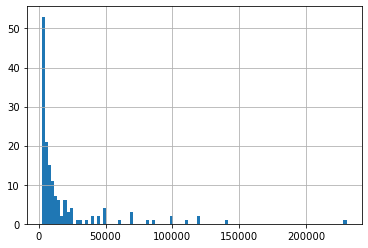

In [36]:
hist_picher = picher['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력합니다. #bins=가로축구간개수

<AxesSubplot:>

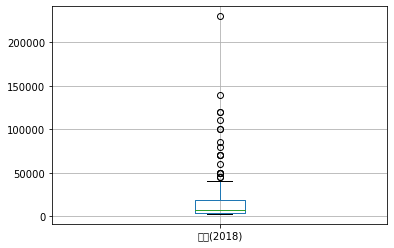

In [32]:
picher.boxplot(column=['연봉(2018)']) # 연봉의 Boxplot을 출력합니다.

-----

### [회귀 분석에 사용할 피처 살펴보기]

In [9]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [10]:
picher_features_df

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [11]:
# Runtime Configuration Parameters
# https://jrc-park.tistory.com/274 
# 그래프의 폰트 사이즈, 크기, 바탕색 등 여러가지 성질들이 모두 matploblit.rcParams 딕셔너리에 담겨있음



In [14]:
# 피처 각각에 대한 histogram을 출력하는 새로운 함수를 선언 

def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16] #그래프 크기 조절 [x축, y축]
    fig = plt.figure(1) #Figure : matplotlib은 한 번에 한장의 그림을 그린다. 이 그림을 가리키는 용어가 figure이다. figure는 그림을 그리는 캔버스로 생각할 수 있으며, 
                        #하나의 figure에는 여러 개의 plot이 들어갈 수 있다. plot이 하나의 차트에 해당한다.
        
    #한 화면에 여러 개의 그래프를 그리려면 figure 함수를 통해 Figure 객체를 
    #먼저 만든 후 add_subplot 메서드를 통해 그리려는 그래프 개수만큼 subplot을 만들면 됨.


    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
    
#subplot의 개수는 add_subplot 메서드의 인자를 통해 조정할 수 있습니다. 
#다음 코드에서 fig.add_subplot(2, 1, 1)은 2x1(행x열)의 subplot을 생성한다는 의미이고
# 번째 인자 1은 생성된 두 개의 subplot 중 첫 번째 subplot을 의미합니다. 
#마찬가지로 (2, 1, 2)는 2x1 subplot에서 두 번째 subplot을 의미합니다

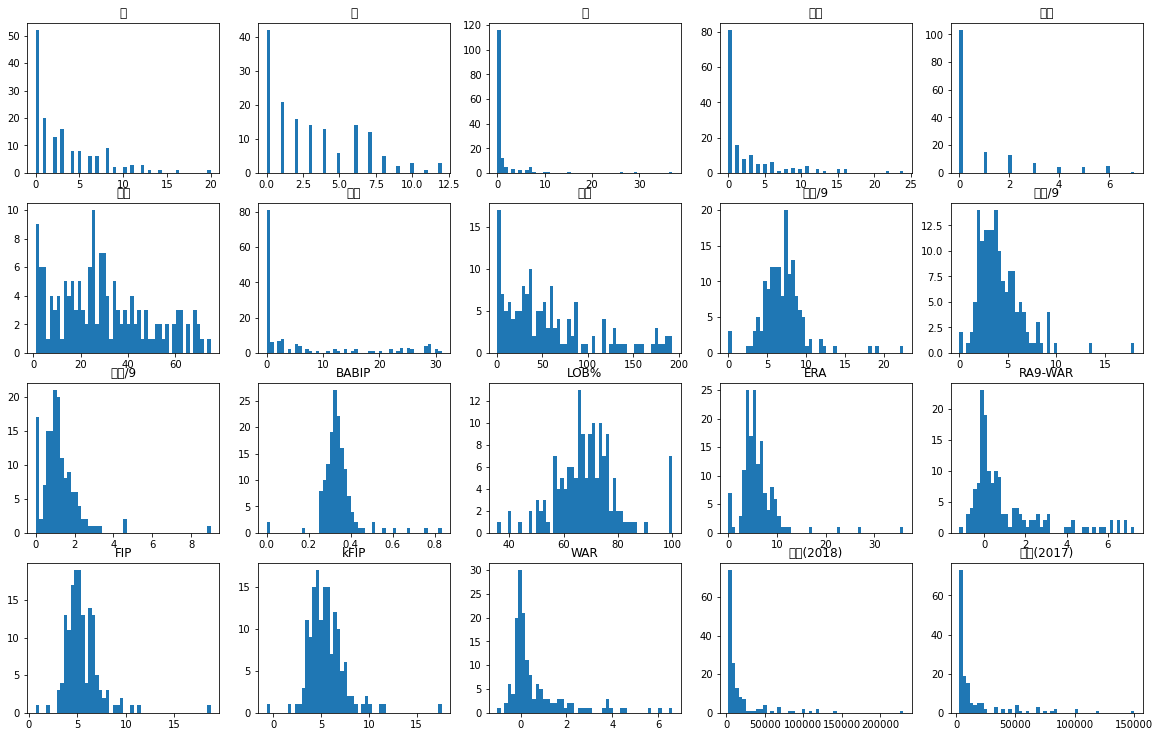

In [15]:
plot_hist_each_column(picher_features_df)

-----

# <Step2. 예측> : 투수의 연봉 예측하기

### 피처의 정규화
- 좁은 의미로 피처 스케일링
- x 에 따른 y 에 대한 회귀분석을 수행할때 서로 다른 단위를 상대적인 값으로 표현하는 것

### [피처들의 단위 맞춰주기 : 피처 스케일링]

- 표준화 방법 적용 (정규분포에서 z-값을 구하는 과정과 동일)
- z-score = ((X)-(X_bar)/X-std)

In [42]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [30]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df



#### lamda() 함수의 사용

DataFrame명.apply(lambda x : x['칼럼명']들의 조건식 
                               if x['칼럼명']들의 조건식 
                               else (x['칼럼명']들의 조건식 또는 값)

In [31]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [32]:
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


-----

### [피처들의 단위 맞춰주기 : one-hot-encoding]     

#### for 범주형 피처 

### 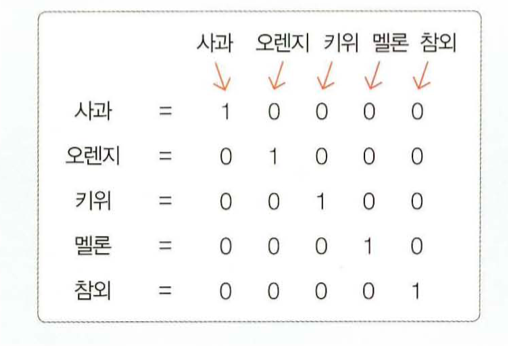





pd.get_dummies(데이터프레임명['칼럼명'])




In [33]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1) # .drop( axis = 삭제할 레이블)
picher_df = picher_df.join(team_encoding)

team_encoding

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
147,0,0,0,0,0,0,0,0,1
148,1,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,1,0,0
150,0,0,0,0,0,0,0,1,0


In [28]:
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [48]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


-----

### [회귀 분석 적용하기]

##### 회귀 분석 모델 학습에 앞서 
##### 학습 데이터셋(학습 전용 데이터셋)과 테스트 데이터셋으로 데이터 분리 

(picher) (X_train, y_train):(X_test, y_test) = 8:2의 비율로 총 4개의 데이터가 생성



#### train_test_split()
from sklearn.model_selection import train_test_split
train_test_split(arrays, test_size, train_size, random_state)

* arrays : 분할시킬 데이터를 입력
* test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
* train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
* random_state : 무작위로 숫자를 뽑을 때 random seed라는 것을 이용하는데, ramdom seed 의 역할을 하는것. 이 값을 안 주면 random_state의 값이 훈련시킬 때마다 바뀌어서 train set과 test set이 계속 해서 달라지게 됨.



In [35]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split #sklearn 모듈의 model_selection패키지 데이터셋 분리
from sklearn.metrics import mean_squared_error #MSE
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])] # y=연봉(2018)

#.columns.difference([제외할 컬럼])]

y = picher_df['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)



##### 회귀 분석 계수 학습 & 학습된 계수 출력

In [37]:
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)

#sklearn 라이브러리의 LinearRegression()으로 모델 오브젝트를 선언한뒤 해당 오브젝트에 model = lr.fit()코드 실행 

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [38]:
# 학습된 계수를 출력합니다.
#'_'는 머신러닝에서 유도된 결과를 나타내는 기호
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


 Y = ax + b
 a : 회기계수


-----

# <Step3. 평가> : 예측 모델 평가하기

### [어떤 피처가 가장 영향력이 강한 피처일까]

In [39]:
!pip install statsmodels

#### Terms

* R-squared : 상관계수의 제곱 / 변동폭이 반응변수를 얼마나 설명하는가? 
    ex) If R-squared = 1, 반응변수의 변화는 모두 독립변수에 의한 것

* Adj-squared : 수정된 r의 제곱. r의 설명력이 과대추정되는 경우가 있기 때문에 대개 이 값을 많이 관찰함
    ex) Adj-squared = 0.32 일 경우 약한 예측력을 가진 모델로 분류 가능성 높음 
    
* const : 상수 - 변동폭이 0일 때 예측되는 반응변수

In [43]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train) #상수항(계산을 위해 추가)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           7.70e-42
Time:                        15:28:25   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

F-통계량에 대한 p-value가 0.05 이하면 'F통계량이 유의미한 의미를 가진다'라고 판단해도 무방하며 회귀분석이 유의미한 결과를 가진다는 것을 의미

###### 유의미한 피처 
===>>>  'WAR', '연봉(2017)', '한화'


https://blog.naver.com/codinglab9807/222699433098
시리즈,데이터프레임,배열 관련

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

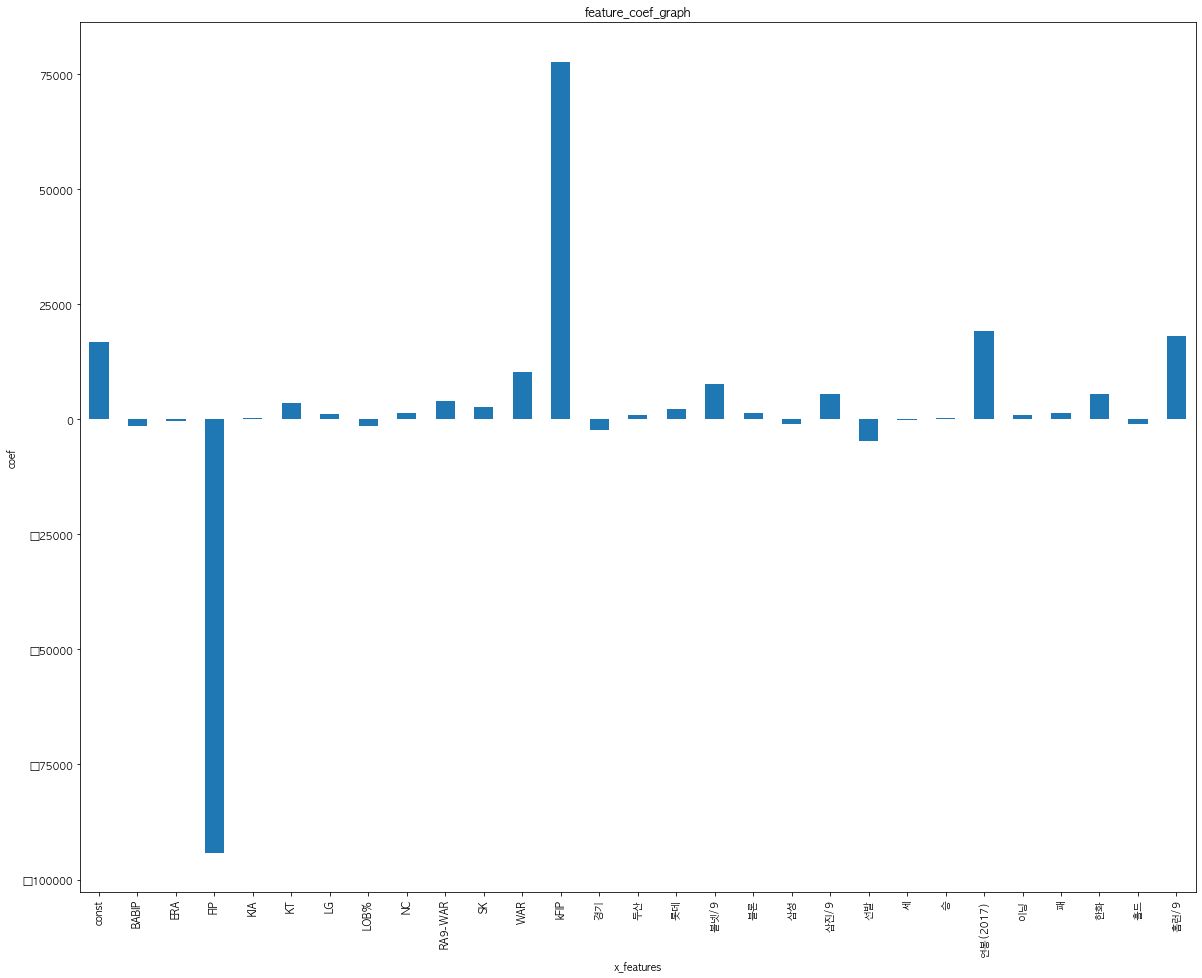

In [46]:
# 한글 출력을 위한 사전 설정 단계입니다.
mpl.rc('font', family='AppleGothic')
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist() #tolist():배열(array)를 list으로 변환
                              #생성한 모델의 회귀계수는 .params 속성을 사용하여 나타냄
coefs_series = pd.Series(coefs)
                         # series : 1차원 리스트와 유사하지만, 리스트와의 큰 차이점은 인덱스 이름을 부여할 수 있다는 점 




# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()


# 회귀 계수를 출력합니다.
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

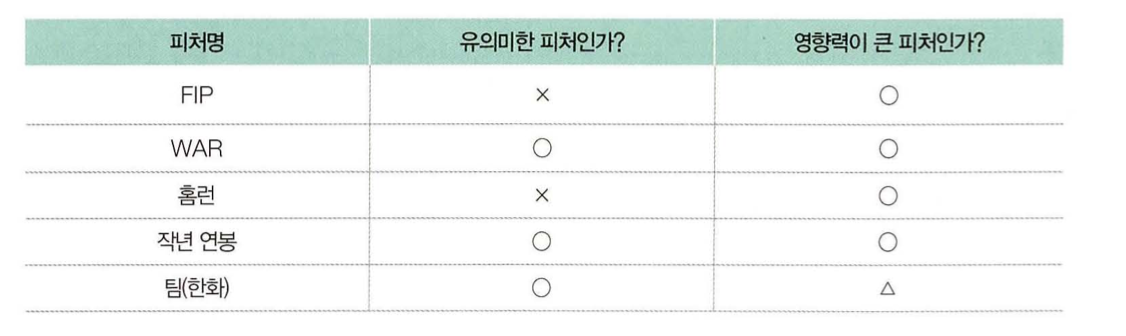

-----

### [예측 모델의 평가] : R2 score, LinerREgression 클래스를 이용하여

In [47]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [49]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train) #fit() 메서드는 선형 회귀 모델에 필요한 두 가지 변수를 전달하는 거

##### R2 score

In [50]:
# 회귀 분석 모델을 평가합니다.
print(model.score(X_train, y_train)) # .score(): returns the coefficient of determination R²
print(model.score(X_test, y_test)) #test set

0.9276949405576705
0.8860171644977817


* 각각의 평가점수가 최대한 벌어지지 않는 것이 좋음 
* If test_score > train_score => Overfit(과적합) 
    ; 모의고사에만 특화된 공부를 한 나머지, 실제 시험의 새로운 유형에 적응하지 못함 

##### RMSE score (Root Mean Square Error)

* 실제값과 에측값의 차이를 절대적인 수치로 나타낸 것
* 높을수록 예측이 부정확함

In [94]:
????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????

Object `????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????

In [51]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)   
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7282.718684746374
14310.696436889142


-----

### `[미니 퀴즈 - 3.1]`
- `Train score, 그리고 Test score의 차이점은 무엇일까요? 그리고이 어떤 점수가 더 높아야 할까요?` 
    - 훈련 데이터셋을 통해 계산한 점수와 테스트 데이터셋을 통해 계산한 점수간에는 어떤 차이가 있는 것인지 적어 봅시다. 그리고 이 두 점수의 차이가 크다면, 어떤 상황을 의미하는 것인지 생각해 봅시다.
        - `대답 예시` : 훈련 데이터셋은 오로지 모델을 학습하고, 비용함수(오차함수)를 평가하는데 사용됩니다. 반면, 테스트 데이터셋은 모델에 영향을 미치지 않습니다. 결과를 예측하기 위한 입력데이터로만 활용됩니다. 가장 이상적인 경우는 Train score, Test score가 차가 없는 것입니다. 이 차이가 벌어질수록 모델이 훈련 데이터셋에 과적합된 것입니다. 일반적으로는 Train score가 약간 더 높습니다.

-----

### [피처들의 상관관계 분석]

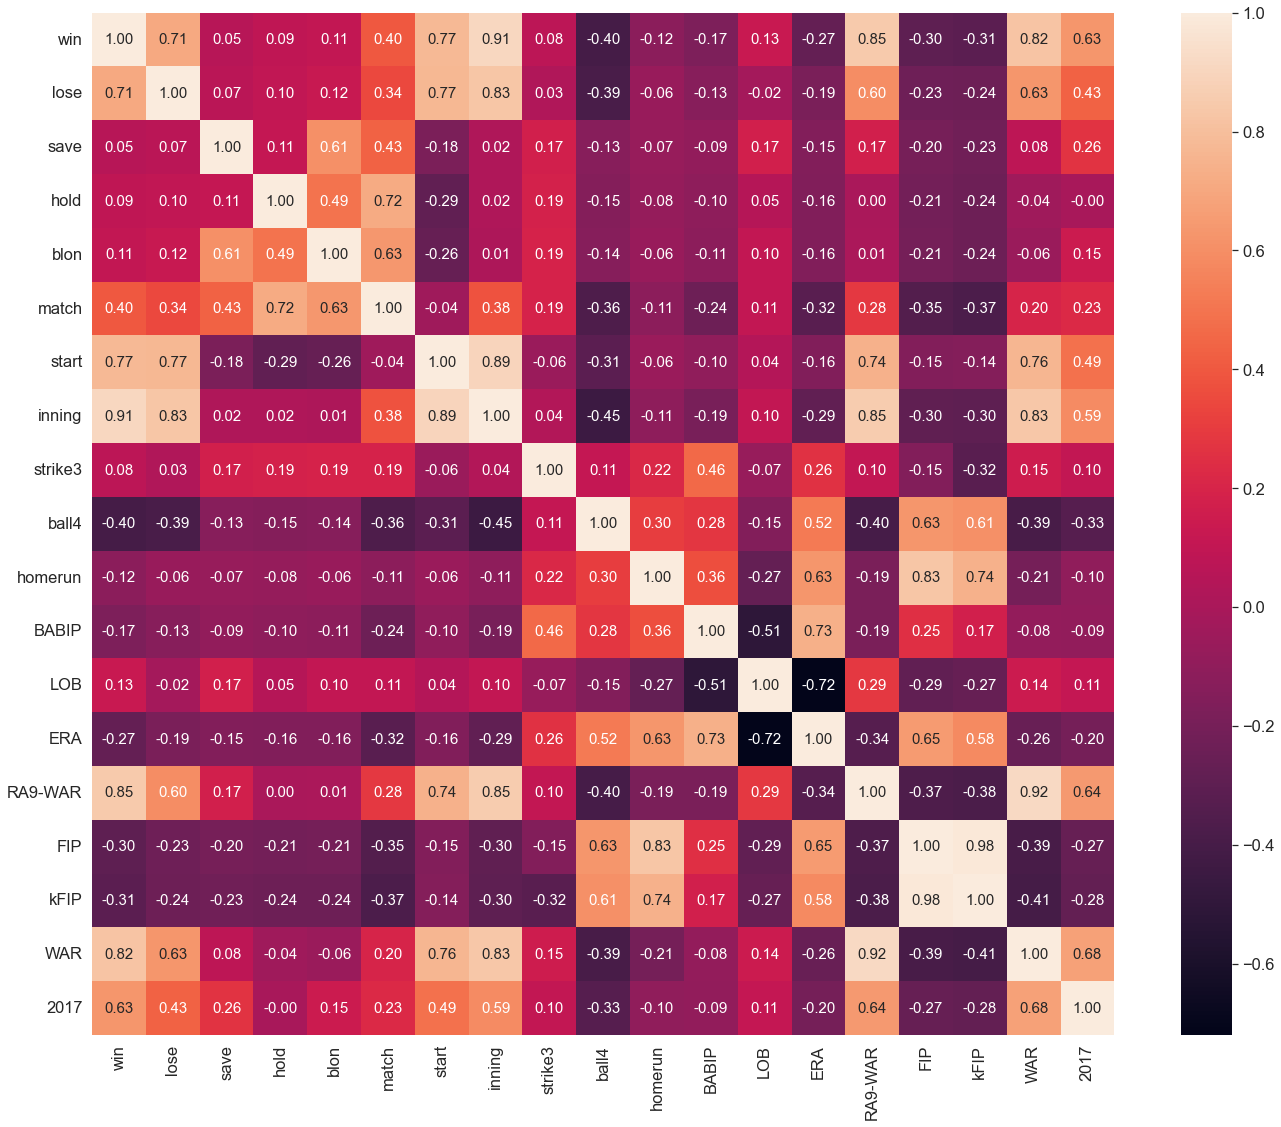

In [52]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산합니다.
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

승-이닝,k

-----

### 다중공선성 확인을 통한 회귀 분석 예측 성능 향상

#### 다중공선성(Multicollinearity)
* 일부 설명 변수가 다른 설명 변수와 상관관계 정도가 높아 회귀 분석시 부정적인 영향을 미치는 현상(독립변수 간의 강한 상관관계로 인해 회귀계수 추정에 오류를 줌)
* 독립변수 간의 상관계수가 r > 0.9 이면 (지나치게 높음) 독립변수가 두 개라도 이름만 다르지 같은 독립변수라고 할 수 있음 ; 똑같은 독립변수 2개를 넣고 회귀분석을 수행하는 것과 같음
--------------------------------
* 다중회귀분석의 전제조건 중에 하나는 독립변수 간의 독립성을 요구하는 것
* 독립성이 없는 여러 독립변수들로 회귀분석을 수행하면 설명력을 떨어뜨리고 표준오차가 증가함



####  분산팽창지수(VIF, Variance Inflation Factor)  : 다중공선성 진단 
* 다른 변수의 선형 결합을 통해 특정 설명 변수를 설명할 수 있는 정도를 나타냄 
* 일반적으로 VIF 계수가 10~15를 넘을 경우 다중공선성이 있는 변수라고 판단
* VIF = 1/(1-R^2)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

4


* X = picher_df[picher_df.columns.difference(['선수명', 'y'])] # y=연봉(2018)



In [69]:
# 반복분을 통해 피처마다의 VIF 계수를 출력합니다.
vif = pd.DataFrame()


vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
                                                                     #두번째 열의길이만큼
vif["features"] = X.columns
vif.round(1)


,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


-----

### `[미니 퀴즈 - 3.2]`
- `적절한 피처를 선정하여 다시 학습해 보세요.` 
    - 사용할 피처를 다시 고른 뒤, 다시 학습을 진행했을 때의 Train score, Test score가 어떻게 향상되는지 살펴봅니다.
        - 저자의 경우 아래의 과정을 거쳐 ['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)'] 피처를 선정했을 때, 더욱 좋은 결과를 나타냈습니다.
            - 선정 과정
                - 1. VIF 계수가 높은 피처들을 우선적으로 제거합니다. 단, (FIP, kFIP)와 같이 유사한 두가지 피처중에는 하나만을 제거합니다.
                - 2. 다시 공선성을 검증합니다. 이전 단계에서는 VIF 계수가 높았던 볼넷, 삼진 등의 피처의 VIF 계수가 낮아진 것을 확인할 수 있습니다. VIF 계수가 비정상적으로 높은 피처를 제거해주면, 다른 피처들의 공선성도 자연스레 감소하기 때문입니다.
                - 3. 여전히 VIF 계수가 높은 피처들을 제거합니다.
                - 4. 남은 피처를 토대로 다시한번 회귀분석을 실시합니다. 분석 결과에서 p-value가 유의하면서도 영향력이 큰 피처들을 선정합니다.
            - train_score, test_score를 비교했을 때, 기존보다 overfit이 비교적 덜 된것으로 보입니다
            - test rmse 역시 감소한 것을 볼 수 있습니다.

### [적절한 피처로 다시 학습하기]

cf)
* X = picher_df[picher_df.columns.difference(['선수명', 'y'])] # y=연봉(2018)
* y = picher_df['y']



In [81]:
# 피처를 재선정합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']] # 무슨 기준으로 재설정?  
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [82]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [83]:
# 결과를 출력합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9150591192570362
0.9038759653889863


cf)
* 0.9276949405576705
* 0.8860171644977821

In [84]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))  # test RMSE score를 출력합니다.

7893.462873347694
13141.866063591095


In [85]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


-----

# <Step4. 시각화> : 분석 결과의 시각화

### [예상 연봉과 실제 연봉 비교]

In [86]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [87]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


<AxesSubplot:xlabel='선수명'>

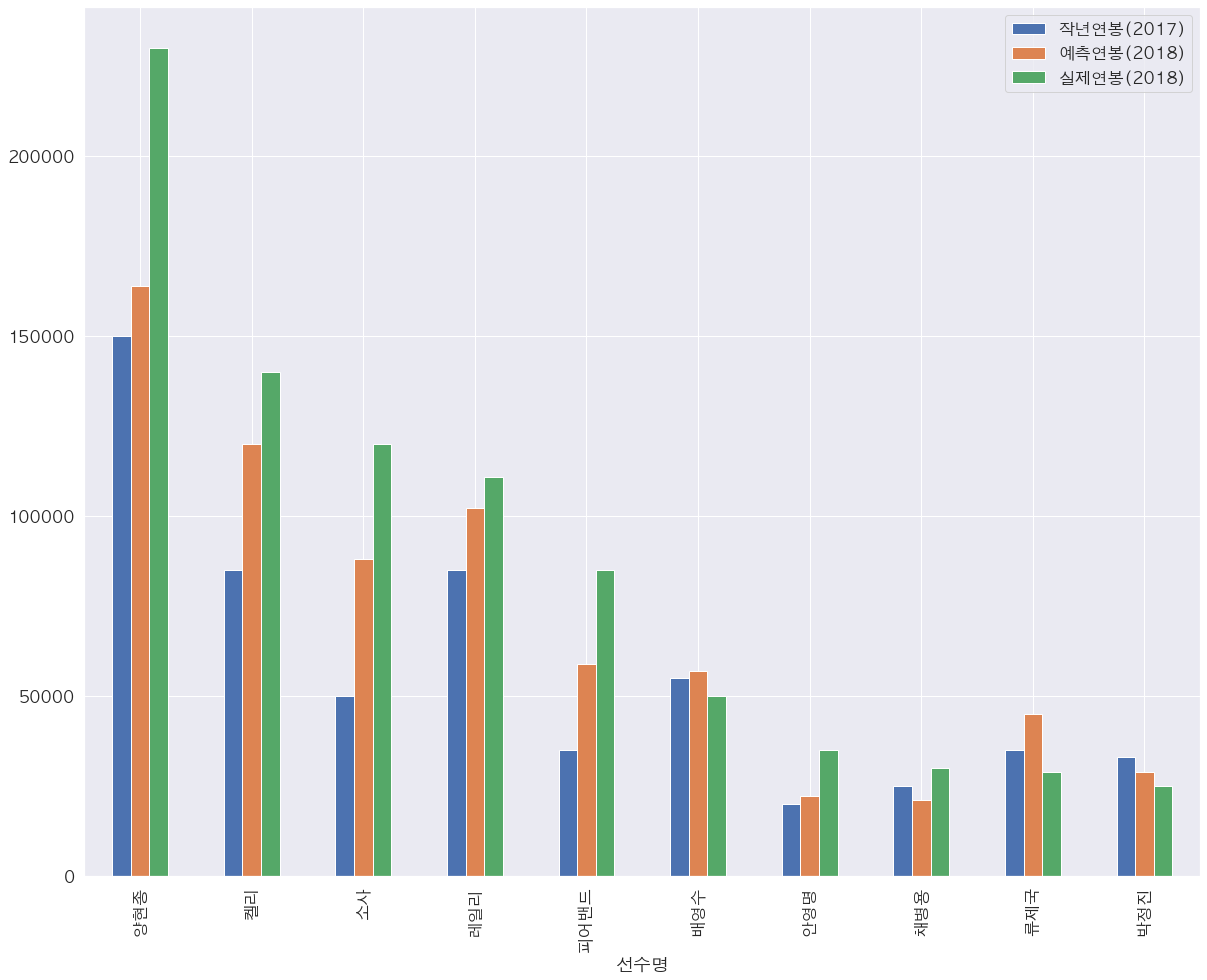

In [88]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
mpl.rc('font', family='AppleGothic')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")